In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook               
%matplotlib inline 

In [3]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190112,190119,190126,190202,190209,190216,190223,190302,190309,190316,190323,190330,190406]
df = get_data(week_nums)

In [4]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/05/2019,03:00:00,REGULAR,6897012,2338472
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/05/2019,07:00:00,REGULAR,6897023,2338487
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/05/2019,11:00:00,REGULAR,6897083,2338565
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/05/2019,15:00:00,REGULAR,6897262,2338624
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/05/2019,19:00:00,REGULAR,6897572,2338679
...,...,...,...,...,...,...,...,...,...,...,...
202959,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/05/2019,05:00:00,REGULAR,5554,374
202960,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/05/2019,09:00:00,REGULAR,5554,374
202961,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/05/2019,13:00:00,REGULAR,5554,374
202962,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/05/2019,17:00:00,REGULAR,5554,374


In [5]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
df.DATE.value_counts().sort_index()

01/05/2019    28619
01/06/2019    28662
01/07/2019    28627
01/08/2019    29035
01/09/2019    28820
              ...  
04/01/2019    29152
04/02/2019    28975
04/03/2019    29104
04/04/2019    29168
04/05/2019    28702
Name: DATE, Length: 91, dtype: int64

In [7]:
import datetime
# from datetime import datetime as dt
# Take the date and time fields into a single datetime column
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [8]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
entries_count = (df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))
entries_count

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1895931,R188,R037,00-00-00,207 ST,2019-02-28 07:00:00,2
1289670,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-25 05:00:00,2
1715385,R123,R290,00-00-02,HOUSTON ST,2019-02-28 04:00:00,2
693951,N071,R013,00-00-01,34 ST-PENN STA,2019-02-28 07:00:00,2
693949,N071,R013,00-00-01,34 ST-PENN STA,2019-02-28 03:00:00,2
...,...,...,...,...,...,...
880365,N141,R356,00-00-02,OZONE PK LEFFRT,2019-02-05 03:00:00,1
880366,N141,R356,00-00-02,OZONE PK LEFFRT,2019-02-05 07:00:00,1
880367,N141,R356,00-00-02,OZONE PK LEFFRT,2019-02-05 11:00:00,1
880368,N141,R356,00-00-02,OZONE PK LEFFRT,2019-02-05 15:00:00,1


In [9]:
entries_count[entries_count["ENTRIES"] == 2]

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1895931,R188,R037,00-00-00,207 ST,2019-02-28 07:00:00,2
1289670,N519,R461,00-03-01,B'WAY-LAFAYETTE,2019-03-25 05:00:00,2
1715385,R123,R290,00-00-02,HOUSTON ST,2019-02-28 04:00:00,2
693951,N071,R013,00-00-01,34 ST-PENN STA,2019-02-28 07:00:00,2
693949,N071,R013,00-00-01,34 ST-PENN STA,2019-02-28 03:00:00,2
...,...,...,...,...,...,...
72186,A035,R170,00-00-03,14 ST-UNION SQ,2019-03-27 17:00:00,2
870829,N135,R385,01-03-01,ROCKAWAY BLVD,2019-03-31 13:00:00,2
1898606,R188,R037,00-06-02,207 ST,2019-02-28 07:00:00,2
1807018,R158,R084,00-06-00,59 ST COLUMBUS,2019-01-14 03:00:00,2


In [10]:
mask1 = ((df["C/A"] == "R188") & 
(df["UNIT"] == "R037") & 
(df["SCP"] == "00-00-00") & 
(df["STATION"] == "207 ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2019, 2, 28).date()))

df[mask1]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
145937,R188,R037,00-00-00,207 ST,1,IRT,02/28/2019,03:00:00,RECOVR AUD,9699226,2100342,2019-02-28 03:00:00
145938,R188,R037,00-00-00,207 ST,1,IRT,02/28/2019,07:00:00,REGULAR,9699394,2100375,2019-02-28 07:00:00
145939,R188,R037,00-00-00,207 ST,1,IRT,02/28/2019,07:00:00,RECOVR AUD,9699393,2100375,2019-02-28 07:00:00
145940,R188,R037,00-00-00,207 ST,1,IRT,02/28/2019,11:00:00,REGULAR,9700027,2100549,2019-02-28 11:00:00
145941,R188,R037,00-00-00,207 ST,1,IRT,02/28/2019,15:00:00,REGULAR,9700354,2100658,2019-02-28 15:00:00
145942,R188,R037,00-00-00,207 ST,1,IRT,02/28/2019,19:00:00,REGULAR,9700812,2100855,2019-02-28 19:00:00
145943,R188,R037,00-00-00,207 ST,1,IRT,02/28/2019,23:00:00,REGULAR,9701050,2100955,2019-02-28 23:00:00


In [11]:
# Get rid of the duplicate entry
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-01-05 03:00:00,1
1760657,R139,R031,04-06-00,34 ST-PENN STA,2019-02-03 19:00:00,1
1760679,R139,R031,04-06-00,34 ST-PENN STA,2019-02-07 11:00:00,1
1760680,R139,R031,04-06-00,34 ST-PENN STA,2019-02-07 15:00:00,1
1760681,R139,R031,04-06-00,34 ST-PENN STA,2019-02-07 19:00:00,1
...,...,...,...,...,...,...
880343,N141,R356,00-00-02,OZONE PK LEFFRT,2019-02-01 15:00:00,1
880344,N141,R356,00-00-02,OZONE PK LEFFRT,2019-02-01 19:00:00,1
880345,N141,R356,00-00-02,OZONE PK LEFFRT,2019-02-01 23:00:00,1
880346,N141,R356,00-00-02,OZONE PK LEFFRT,2019-02-02 03:00:00,1


In [12]:
turnstile_daily_max_entries = (df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstile_daily_max_entries

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/05/2019,6897740
1,A002,R051,02-00-00,59 ST,01/06/2019,6898382
2,A002,R051,02-00-00,59 ST,01/07/2019,6899906
3,A002,R051,02-00-00,59 ST,01/08/2019,6901408
4,A002,R051,02-00-00,59 ST,01/09/2019,6902887
...,...,...,...,...,...,...
438318,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/01/2019,5554
438319,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/02/2019,5554
438320,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/03/2019,5554
438321,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/04/2019,5554


In [13]:
turnstile_daily_max_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstile_daily_max_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_15859/2205457872.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstile_daily_max_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstile_daily_max_entries


In [14]:
turnstile_daily_max_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [15]:

(turnstile_daily_max_entries[turnstile_daily_max_entries["ENTRIES"] < turnstile_daily_max_entries["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())   

C/A   UNIT  SCP       STATION        
A006  R079  00-03-01  5 AV/59 ST          1
A011  R080  01-03-00  57 ST-7 AV         16
A016  R081  03-06-01  49 ST               1
A025  R023  01-03-01  34 ST-HERALD SQ    90
A027  R082  01-03-00  28 ST               1
                                         ..
R641  R210  00-00-00  BEVERLY RD          1
R645  R110  00-03-00  FLATBUSH AV-B.C     3
            00-03-02  FLATBUSH AV-B.C     1
R646  R110  01-00-01  FLATBUSH AV-B.C    88
R730  R431  00-00-04  EASTCHSTER/DYRE    90
Length: 328, dtype: int64

In [16]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstile_daily_max_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

1279 5664363.0
1443 7054160.0
1261 3875856.0
962 2117561.0
235208427 68073706.0
644 2234841.0
3211 5527037.0
1296 1949564336.0
459313 11321306.0
459468 6999926.0
512 67586631.0
753 2385882.0
62 552625973.0
373 10481617.0
1800 9913754.0
1808 3596117.0
419 1094836.0
139 3803351.0
439 1412112.0
297 6436755.0
1122 6611558.0
100665416 5998038.0
42 4128118.0
2221 1629651041.0
1659 2390372.0
33611930 186793.0
3845206 1319028.0
1319880 3845206.0
684 1276366641.0
764 9485331.0
579 7671811.0
19 5490615.0
459625 2908210.0
1797 1973399.0
878 1360328.0
752 6236784.0
3019 5389064.0
2196693 5869413.0
5871517 2196693.0
8416216 3031855.0
3033376 8416216.0
1776810 5099614.0
5101826 1776810.0
10585172 669641.0
673305 10585172.0
1776 4743292.0
2098 10473352.0
68 2414727.0
644485176 3992050.0
498 5413988.0
147655 1924779.0
839317244 0.0
134582410 476783.0
574620 134218375.0
134224756 546200.0
8 4924997.0
7 13186878.0
80 2807037.0
14483477 181537.0
45 14492082.0
9241052 3108531.0
2 2279843.0
3633688 2362489

In [17]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstile_daily_max_entries["DAILY_ENTRIES"] = turnstile_daily_max_entries.apply(get_daily_counts, axis=1, max_counter=500000)



1279 5664363.0
1443 7054160.0
1261 3875856.0
962 2117561.0
235208427 68073706.0
589898 1383163.0
1274 589898.0
644 2234841.0
3211 5527037.0
1296 1949564336.0
459313 11321306.0
459468 6999926.0
512 67586631.0
753 2385882.0
62 552625973.0
373 10481617.0
1825 628138.0
1800 9913754.0
1808 3596117.0
419 1094836.0
139 3803351.0
439 1412112.0
297 6436755.0
1122 6611558.0
100665416 5998038.0
42 4128118.0
2221 1629651041.0
1659 2390372.0
8 913957.0
33611930 186793.0
458903 1265085.0
3845206 1319028.0
1319880 3845206.0
1101041 2010630.0
2011711 1101041.0
684 1276366641.0
764 9485331.0
579 7671811.0
19 5490615.0
459625 2908210.0
1797 1973399.0
878 1360328.0
752 6236784.0
3019 5389064.0
589824 0.0
2196693 5869413.0
5871517 2196693.0
2224575 3171521.0
3172932 2224575.0
8416216 3031855.0
3033376 8416216.0
1776810 5099614.0
5101826 1776810.0
10585172 669641.0
673305 10585172.0
1776 4743292.0
2098 10473352.0
68 2414727.0
644485176 3992050.0
498 5413988.0
147655 1924779.0
839317244 0.0
134582410 476783

In [18]:
station_daily = turnstile_daily_max_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/06/2019,12021.0
1,1 AV,01/07/2019,19538.0
2,1 AV,01/08/2019,20414.0
3,1 AV,01/09/2019,21066.0
4,1 AV,01/10/2019,21178.0
...,...,...,...
33947,ZEREGA AV,04/01/2019,2794.0
33948,ZEREGA AV,04/02/2019,2779.0
33949,ZEREGA AV,04/03/2019,2908.0
33950,ZEREGA AV,04/04/2019,2898.0


## Get the total entries of each station over 2022 Q1 in descending Order

In [19]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index().rename(columns={'DAILY_ENTRIES':"Total_Entries"})
station_totals

,STATION,Total_Entries
0,34 ST-PENN STA,14365874.0
1,GRD CNTRL-42 ST,11376982.0
2,34 ST-HERALD SQ,9720665.0
3,23 ST,9289497.0
4,14 ST-UNION SQ,8625884.0
...,...,...
373,NEWARK HM HE,48439.0
374,ROCKAWAY PARK B,47986.0
375,BEACH 98 ST,32163.0
376,BROAD CHANNEL,23427.0


In [20]:
top_20_2019=station_totals.head(20)
top_20_2019

,STATION,Total_Entries
0,34 ST-PENN STA,14365874.0
1,GRD CNTRL-42 ST,11376982.0
2,34 ST-HERALD SQ,9720665.0
3,23 ST,9289497.0
4,14 ST-UNION SQ,8625884.0
5,42 ST-PORT AUTH,8085592.0
6,TIMES SQ-42 ST,7648820.0
7,86 ST,7387445.0
8,FULTON ST,7036234.0
9,CANAL ST,7008100.0


Text(0.5, 1.0, 'Highest Traffic Stations (2019 Q1)')

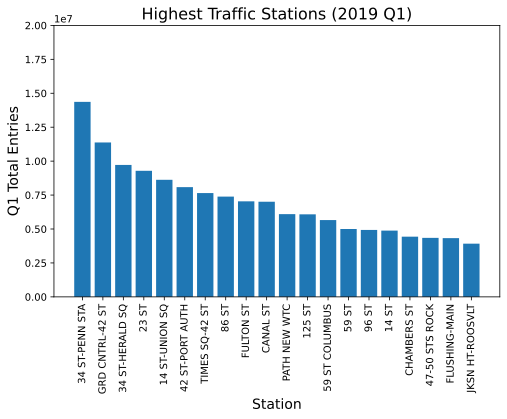

In [21]:
plt.figure(figsize=(8,5))
plt.bar(top_20_2019['STATION'], top_20_2019['Total_Entries'])
plt.ylabel('Q1 Total Entries',fontsize=14)
plt.xlabel('Station',fontsize=14)
plt.xticks(rotation=90)
plt.ylim(0,20000000)
plt.title('Highest Traffic Stations (2019 Q1)',fontsize=16)

In [22]:
least_20_2019=station_totals.tail(20)
least_20_2019

,STATION,Total_Entries
358,215 ST,143281.0
359,AVENUE I,135441.0
360,BEACH 25 ST,135324.0
361,21 ST,132042.0
362,BOTANIC GARDEN,130416.0
363,ATLANTIC AV,128798.0
364,39 AV,117818.0
365,NEPTUNE AV,104133.0
366,CYPRESS HILLS,102874.0
367,E 143/ST MARY'S,79052.0


Text(0.5, 1.0, 'Lowest Traffic Stations (2019 Q1)')

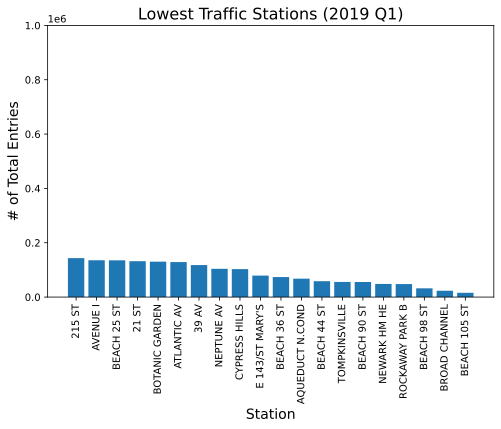

In [23]:
plt.figure(figsize=(8,5))
plt.bar(least_20_2019['STATION'], least_20_2019['Total_Entries'])
plt.ylabel('# of Total Entries',fontsize=14)
plt.xlabel('Station',fontsize=14)
plt.xticks(rotation=90)
plt.ylim(0,1000000)                                    #y-axis range is different from the highest traffic graph
plt.title('Lowest Traffic Stations (2019 Q1)',fontsize=16)

#plot.savefig('2019_least',dpi=300, bbox_inches="tight")
#plot.show()

In [24]:
station_totals

,STATION,Total_Entries
0,34 ST-PENN STA,14365874.0
1,GRD CNTRL-42 ST,11376982.0
2,34 ST-HERALD SQ,9720665.0
3,23 ST,9289497.0
4,14 ST-UNION SQ,8625884.0
...,...,...
373,NEWARK HM HE,48439.0
374,ROCKAWAY PARK B,47986.0
375,BEACH 98 ST,32163.0
376,BROAD CHANNEL,23427.0


In [25]:
import numpy as np

In [26]:
station_daily

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/06/2019,12021.0
1,1 AV,01/07/2019,19538.0
2,1 AV,01/08/2019,20414.0
3,1 AV,01/09/2019,21066.0
4,1 AV,01/10/2019,21178.0
...,...,...,...
33947,ZEREGA AV,04/01/2019,2794.0
33948,ZEREGA AV,04/02/2019,2779.0
33949,ZEREGA AV,04/03/2019,2908.0
33950,ZEREGA AV,04/04/2019,2898.0


In [27]:
station_daily['Total_Entries']=station_daily.groupby(["STATION"])['DAILY_ENTRIES'].transform(lambda x:x.sum())
station_daily.sort_values(["Total_Entries","DATE"], ascending=[False,True],inplace=True)
station_daily

,STATION,DATE,DAILY_ENTRIES,Total_Entries
5488,34 ST-PENN STA,01/06/2019,66389.0,14365874.0
5489,34 ST-PENN STA,01/07/2019,161898.0,14365874.0
5490,34 ST-PENN STA,01/08/2019,165268.0,14365874.0
5491,34 ST-PENN STA,01/09/2019,166763.0,14365874.0
5492,34 ST-PENN STA,01/10/2019,170079.0,14365874.0
...,...,...,...,...
12725,BEACH 105 ST,04/01/2019,243.0,15767.0
12726,BEACH 105 ST,04/02/2019,239.0,15767.0
12727,BEACH 105 ST,04/03/2019,235.0,15767.0
12728,BEACH 105 ST,04/04/2019,263.0,15767.0


In [28]:
station_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily['DATE']).dt.dayofweek
station_daily['WEEK_OF_YEAR'] = pd.to_datetime(station_daily['DATE']).dt.week
station_daily['MONTH_OF_YEAR'] = pd.to_datetime(station_daily['DATE']).dt.month

station_daily=station_daily[
    (station_daily["WEEK_OF_YEAR"]!=52)&(station_daily["MONTH_OF_YEAR"]!=4)
]
station_daily

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_15859/686544772.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily['WEEK_OF_YEAR'] = pd.to_datetime(station_daily['DATE']).dt.week


,STATION,DATE,DAILY_ENTRIES,Total_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
5488,34 ST-PENN STA,01/06/2019,66389.0,14365874.0,6,1,1
5489,34 ST-PENN STA,01/07/2019,161898.0,14365874.0,0,2,1
5490,34 ST-PENN STA,01/08/2019,165268.0,14365874.0,1,2,1
5491,34 ST-PENN STA,01/09/2019,166763.0,14365874.0,2,2,1
5492,34 ST-PENN STA,01/10/2019,170079.0,14365874.0,3,2,1
...,...,...,...,...,...,...,...
12720,BEACH 105 ST,03/27/2019,228.0,15767.0,2,13,3
12721,BEACH 105 ST,03/28/2019,237.0,15767.0,3,13,3
12722,BEACH 105 ST,03/29/2019,235.0,15767.0,4,13,3
12723,BEACH 105 ST,03/30/2019,90.0,15767.0,5,13,3


In [32]:
Ridership_Weekdays=(
    station_daily.groupby("DAY_OF_WEEK_NUM")
    .agg({"DAILY_ENTRIES":"sum"}).reset_index()).rename(columns={"DAILY_ENTRIES":"Q1_Total"})
Ridership_Weekdays["Average"]= Ridership_Weekdays["Q1_Total"].apply(lambda x: x/12)
Ridership_Weekdays["Avg_Entries_million"]=Ridership_Weekdays["Average"].apply(lambda x: x/1000000)
Ridership_Weekdays   

,DAY_OF_WEEK_NUM,Q1_Total,Average,Avg_Entries_million
0,0,64800769.0,5.400064e+06,5.400064
1,1,74673987.0,6.222832e+06,6.222832
2,2,74561374.0,6.213448e+06,6.213448
3,3,75865385.0,6.322115e+06,6.322115
4,4,73185232.0,6.098769e+06,6.098769
5,5,38856295.0,3.238025e+06,3.238025
6,6,35772473.0,2.981039e+06,2.981039


Text(0.5, 1.0, 'Ridership Per Weekday In 2019 Q1')

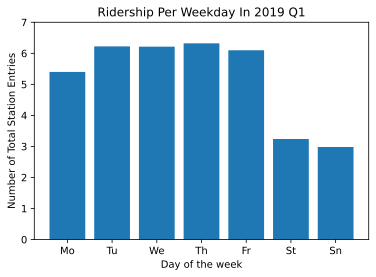

In [34]:
plt.bar(Ridership_Weekdays["DAY_OF_WEEK_NUM"],Ridership_Weekdays["Avg_Entries_million"])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of Total Station Entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.ylim(0,7)
plt.title('Ridership Per Weekday In 2019 Q1')

In [36]:
import seaborn as sns

/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


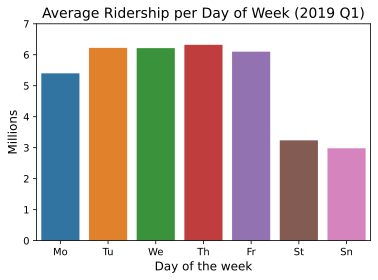

In [51]:

sns.barplot(Ridership_Weekdays["DAY_OF_WEEK_NUM"],Ridership_Weekdays["Avg_Entries_million"])
    
    
plt.xlabel('Day of the week',fontsize=12)
plt.ylabel('Millions', fontsize=12)
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.ylim(0,7)
plt.title('Average Ridership per Day of Week (2019 Q1)',fontsize=14)
plt.savefig('Average Ridership per DayofWeek (2019 Q1)',dpi=300)
plt.show()


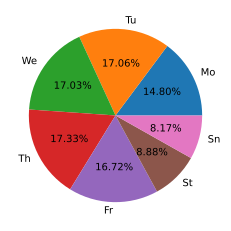

In [50]:
plt.pie(Ridership_Weekdays["Avg_Entries_million"], labels=['Mo','Tu','We','Th','Fr','St','Sn'],
        explode = (0, 0, 0, 0,0,0,0), autopct='%1.2f%%')
#plt.title('Ridership Share by Day of Week (2019 Q1)')
plt.savefig('Ridership Share by Day of Week (2019 Q1)',dpi=300)
plt.show()

## Monthly Trend

In [ ]:
station_daily

In [ ]:
Monthly=station_daily.groupby(["MONTH_OF_YEAR"])['DAILY_ENTRIES'].sum().reset_index().rename(columns={"DAILY_ENTRIES":"MONTHLY_ENTRIES"})
Monthly

In [ ]:
plt.bar(Monthly['MONTH_OF_YEAR'], Monthly["MONTHLY_ENTRIES"])
plt.title("Monthly Traffic of NYC subway 2019 Q1")
plt.ylim(0,200000000)

In [ ]:
Q1_sum=Monthly["MONTHLY_ENTRIES"].sum()
Q1_sum